In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy import stats
from sklearn.metrics import r2_score

Данные: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

In [2]:
df = pd.read_csv('train.csv')

# корреляция между площадью жилья и стоимостью
correlation = df[['GrLivArea', 'SalePrice']].corr().iloc[0, 1]
print("Коэффициент корреляции:", correlation)

Коэффициент корреляции: 0.7086244776126515


Величина достоверности аппроксимации R^2: 0.5021486502718042


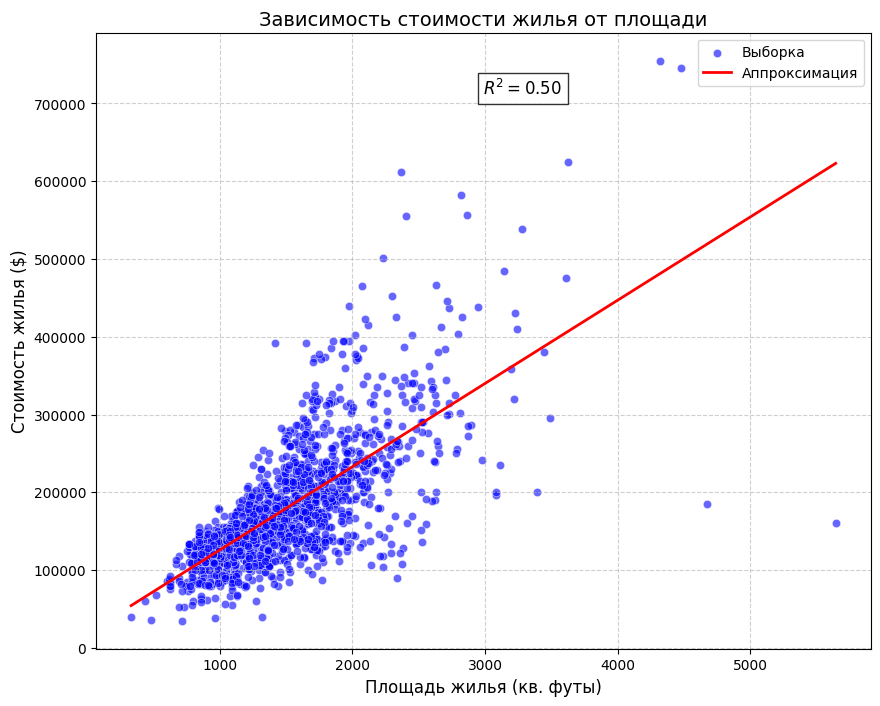

In [3]:
x = df['GrLivArea'].values.reshape(-1, 1)
y = df['SalePrice']

# Линейная регрессия
model = LinearRegression().fit(x, y)
y_pred = model.predict(x)

# R^2
r2 = r2_score(y, y_pred)
print("Величина достоверности аппроксимации R^2:", r2)

# Построение графика с использованием seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x=x.flatten(), y=y, label='Выборка', alpha=0.6, color='blue')
sns.lineplot(x=x.flatten(), y=y_pred, color='red', label='Аппроксимация', linewidth=2)

# Аннотация с R^2
plt.text(0.5, 0.9, f'$R^2 = {r2:.2f}$', fontsize=12, transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8))

# Настройка графика
plt.xlabel("Площадь жилья (кв. футы)", fontsize=12)
plt.ylabel("Стоимость жилья ($)", fontsize=12)
plt.title("Зависимость стоимости жилья от площади", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [4]:
random_sample = df.sample(frac=0.33, random_state=42)
stratified_sample = df.groupby('YearBuilt').apply(lambda x: x.sample(frac=0.33, random_state=42)).reset_index(drop=True)

# 1. Расчет среднего значения для обеих выборок
mean_random = random_sample['SalePrice'].mean()
mean_stratified = stratified_sample['SalePrice'].mean()

print(f"Средняя стоимость жилья в случайной выборке: {mean_random:.2f}")
print(f"Средняя стоимость жилья в стратифицированной выборке: {mean_stratified:.2f}")
print('\n')

# 2. Расчет стандартной ошибки для обеих выборок
std_error_random = random_sample['SalePrice'].std() / np.sqrt(len(random_sample))
std_error_stratified = stratified_sample['SalePrice'].std() / np.sqrt(len(stratified_sample))

# Доверительные интервалы для случайной выборки
print("Доверительные интервалы для случайной выборки:")
for confidence_level in (0.90, 0.95, 0.99):
    ci_random = stats.t.interval(confidence_level, len(random_sample) - 1, loc=mean_random, scale=std_error_random)
    print(f"Уровень доверия {confidence_level*100}%: ({ci_random[0]:.2f}, {ci_random[1]:.2f})")

print('\n')

# Доверительные интервалы для стратифицированной выборки
print("Доверительные интервалы для стратифицированной выборки:")
for confidence_level in (0.90, 0.95, 0.99):
    ci_stratified = stats.t.interval(confidence_level, len(stratified_sample) - 1, loc=mean_stratified, scale=std_error_stratified)
    print(f"Уровень доверия {confidence_level*100}%: ({ci_stratified[0]:.2f}, {ci_stratified[1]:.2f})")

# 3. Среднее значение генеральной выборки
df_mean = df['SalePrice'].mean()
print(f"\nСреднее значение генеральной выборки: {df_mean:.2f}")

Средняя стоимость жилья в случайной выборке: 180666.02
Средняя стоимость жилья в стратифицированной выборке: 179219.68


Доверительные интервалы для случайной выборки:
Уровень доверия 90.0%: (174227.58, 187104.47)
Уровень доверия 95.0%: (172989.60, 188342.45)
Уровень доверия 99.0%: (170562.80, 190769.25)


Доверительные интервалы для стратифицированной выборки:
Уровень доверия 90.0%: (173297.83, 185141.54)
Уровень доверия 95.0%: (172159.20, 186280.17)
Уровень доверия 99.0%: (169927.17, 188512.19)

Среднее значение генеральной выборки: 180921.20
